In [2]:
# 2(a)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

data = load_digits()
X = data.data
y=data.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

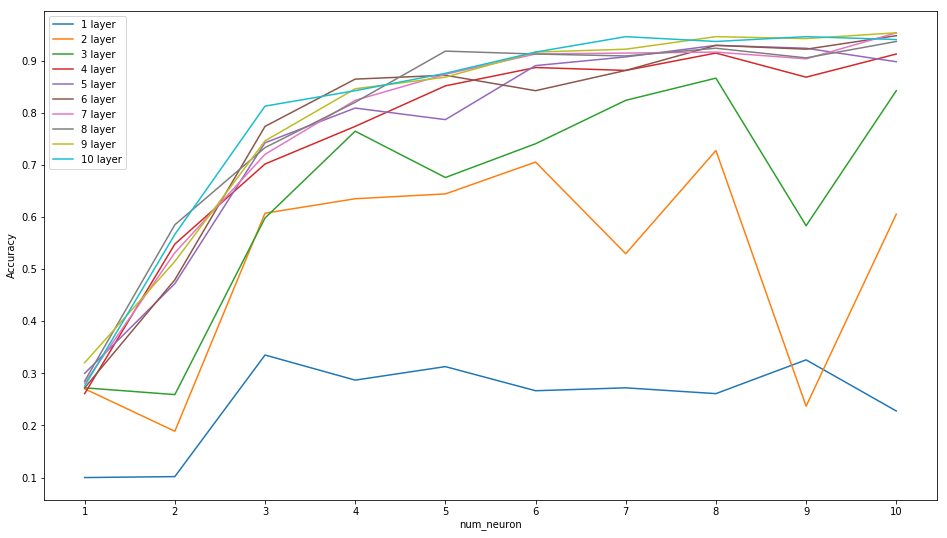

CPU times: user 7min 52s, sys: 1min 16s, total: 9min 8s
Wall time: 7min 52s


In [3]:
%%time
# 2(b)
import warnings
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')#ignore the ipython warnings

# Sdandardize the data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

plt.figure(figsize=(16,9))
plt.ylabel("Accuracy")
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel("num_neuron")

for num_layer in range(10):
    accuracy = []
    for num_neuron in range(10):
        #hidden_layer_sizes = [[num_neuron] for i in range(num_layer)]
        mlp = MLPClassifier(hidden_layer_sizes=(num_neuron+1,num_layer+1),random_state = 42)
        mlp.fit(X_train_scaled,y_train)
        y_pred = mlp.predict(X_test_scaled)
        mlp_accuracy = accuracy_score(y_pred,y_test)
        #print("{:.2f}".format(mlp_accuracy))
        accuracy.append(mlp_accuracy)
    #print(accuracy)
    plt.plot(range(1,11),accuracy,label = "{} layer".format(num_layer+1))

plt.legend()
plt.show()